In [5]:
import numpy as np
import pandas as pd
import os
import math
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import average_precision_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

## Reading CSVs and filling NAs w/0s

In [3]:
rank=pd.read_csv('all_risk_df_ordered.csv')
rank=rank.fillna(0)

# Linear Regression

In [6]:
copy_df=rank.copy()
copy1_df=rank.copy()
x_df=rank.drop(["ranking_y"],axis=1)
y_df=copy_df["ranking_y"]
X_df=x_df.iloc[:,2:]

X_df=sm.add_constant(X_df)
model = sm.OLS(y_df,X_df.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ranking_y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     4319.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:24:17   Log-Likelihood:            -1.4212e+06
No. Observations:              423944   AIC:                         2.843e+06
Df Residuals:                  423900   BIC:                         2.843e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -214.5617     11.296    -18.995      0.000    -236.701    -192.422
teamId                   0.0171      0.000     55.362      0.000       0.017       0.018
distance1_2_x           -1.0044      0.052    -19.311      0.000      -1.106      -0.902
distance1_3_x            0.6239      0.063      9.968      0.000       0.501       0.747
distance1_4_x            0.2525      0.043      5.919      0.000       0.169       0.336
distance2_3_x            0.8053      0.051     15.831      0.000       0.706       0.905
distance2_4_x           -1.2859      0.057    -22.739      0.000      -1.397      -1.175
distance3_4_x            0.4134      0.039     10.654      0.000       0.337       0.489
distance_centroid1_x     2.9352      0.023    126.304      0.000       2.890       2.981
distance_centroid2_x     1.2577      0.044     28.702      0.000       1.172       1.344
distance_centroid3_x    -1.5053      0.047    -32.157      0.000      -1.597      -1.414
distance_centroid4_x     1.4914      0.032     46.498      0.000       1.429       1.554
cluster_A_x             -2.4667      0.710     -3.472      0.001      -3.859      -1.074
cluster_B_x            -34.6906      0.816    -42.536      0.000     -36.289     -33.092
cluster_C_x            -23.5426      0.714    -32.959      0.000     -24.943     -22.143
cluster_D_x            -32.2168      0.824    -39.100      0.000     -33.832     -30.602
n_players_y             -0.1507      0.062     -2.414      0.016      -0.273      -0.028
distance1_2_y            0.0772      0.002     42.969      0.000       0.074       0.081
distance1_3_y            0.0165      0.004      4.353      0.000       0.009       0.024
distance1_4_y           -0.0050      0.004     -1.380      0.168      -0.012       0.002
distance2_3_y            0.0408      0.002     23.565      0.000       0.037       0.044
distance2_4_y            0.0280      0.002     13.044      0.000       0.024       0.032
distance3_4_y            0.0250      0.001     17.638      0.000       0.022       0.028
distance_centroid1_y    -0.0178      0.002    -11.543      0.000      -0.021      -0.015
distance_centroid2_y    -0.0113      0.001     -8.376      0.000      -0.014      -0.009
distance_centroid3_y    -0.0007      0.001     -0.533      0.594      -0.003       0.002
distance_centroid4_y    -0.0177      0.001    -17.076      0.000      -0.020      -0.016
cluster_A_y            217.9898     11.213     19.440      0.000     196.012     239.968
cluster_B_y            233.6394     11.224     20.816      0.000     211.641     255.638
cluster_C_y            235.2722     11.240     20.931      0.000     213.242     257.303
cluster_D_y            266.9636     11.258     23.714      0.000     244.899     289.028
agility_y               31.8090      0.103    308.115    

## RMSE for Linear Regression

In [4]:
y_pred = model.predict(X_df)
rms = sqrt(mean_squared_error(y_df, y_pred))
rms

6.913142137301564

# Classification for Top 5

In [7]:
copy_df['in Top 5']=np.where(copy_df['ranking_y']<=5, 1,0)

In [8]:
x_df=copy_df.drop(["ranking_y",'in Top 5'],axis=1)
y_df=copy_df['in Top 5']
X_df=x_df.iloc[:,2:]

## Scaling with Standard Scaler

In [10]:
std_scaler=preprocessing.StandardScaler()
X_df=std_scaler.fit_transform(X_df)

## Initialising DFs for plotting

In [11]:
res_w1=pd.DataFrame()
res_w2=pd.DataFrame()

# Logistic Regression

In [12]:
test_size=0.2
seed=7

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear',class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

Confusion Matrix
[[45768 20801]
 [ 4487 13733]]

Accuracy 70.17538
Accuracy check with conf. matrix 70.17538


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


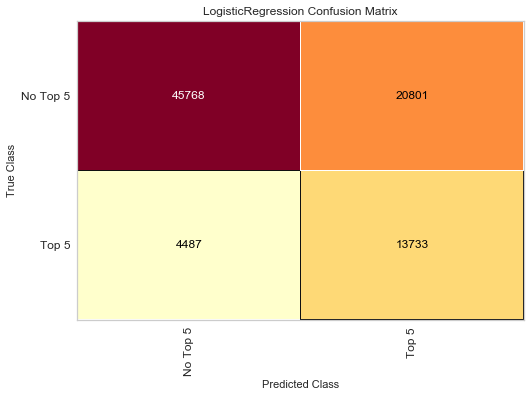

In [13]:
y_predicted = model.predict(X_test)

c_matrix=confusion_matrix(y_test, y_predicted)

print("Confusion Matrix")
print(c_matrix)

print()
print(f'Accuracy {model.score(X_test, y_test)*100:.5f}')
print(f'Accuracy check with conf. matrix {(c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()*100:.5f}')


#using yellowbrick
import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model, classes=["No Top 5","Top 5"])

cm.score(X_test, y_test)
cm.show()

# Checking for overfitting

In [14]:
y_pred_t = model.predict(X_train)
print('TRAIN METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_train, y_pred_t)}')
print(f'F1 Score: {metrics.f1_score(y_train, y_pred_t)}')
metrics.confusion_matrix(y_train,y_pred_t)
average_precision = average_precision_score(y_train, y_pred_t)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

print(f'AUC: {roc_auc_score(y_train, y_pred_t)}')

TRAIN METRICS
Accuracy: 0.7017528858486533
F1 Score: 0.5224218845903249
Average precision-recall score: 0.35
AUC: 0.7215772333596369


In [15]:
y_pred = model.predict(X_test)
print('TEST METRICS')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred)}')
metrics.confusion_matrix(y_test,y_pred)
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print(f'AUC: {roc_auc_score(y_test, y_pred)}')

TEST METRICS
Accuracy: 0.7017537652289801
F1 Score: 0.5206429844182431
Average precision-recall score: 0.35
AUC: 0.7206296949234801


# Ensemble Max Voting

In [16]:
model1 = LogisticRegression(random_state=1,class_weight='balanced')
model2 = tree.DecisionTreeClassifier(random_state=1,class_weight='balanced')
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7851726049369612

In [18]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y_df))

In [19]:
train_X, test_X, train_y, test_y = train_test_split(X_df, binary_encoded_y, random_state=1)

In [20]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
classifier.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [21]:
predictions = classifier.predict(test_X)

In [22]:
print("Accuracy:",metrics.accuracy_score(test_y, predictions))

Accuracy: 0.7985205593191553


In [23]:
confusion_matrix(test_y, predictions)

array([[78687,  4288],
       [17066,  5945]])

In [26]:
X_df

array([[-0.51010654, -1.21890519, -1.22767395, ..., -0.69108713,
        -0.66832681, -0.37131288],
       [-0.49008428, -1.21890519, -1.22767395, ...,  0.28298286,
        -0.44358468, -0.5639839 ],
       [-0.47006201,  1.22551731,  1.01195896, ..., -0.28229106,
        -0.58937865, -0.51110275],
       ...,
       [ 3.51436925,  0.47552483,  1.36174967, ..., -0.59322215,
        -0.1565663 , -0.23856049],
       [ 3.53439152,  0.47398567,  0.83450407, ..., -0.54128426,
        -0.16747855, -0.42786141],
       [ 3.55441379, -0.01403049,  0.25697131, ..., -0.49616773,
        -0.20376457, -0.41812552]])

In [27]:
y_df.value_counts()

0    332585
1     91359
Name: in Top 5, dtype: int64

# Upsampling SMOTE Method

In [28]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(train_X,train_y)

In [32]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
classifier.fit(x_train_res, y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [33]:
predictions = classifier.predict(test_X)

In [34]:
print("Accuracy:",metrics.accuracy_score(test_y, predictions))

Accuracy: 0.7438907025456193


In [38]:
x_train_res

array([[ 0.07053922, -1.21890519, -1.22767395, ..., -0.54275211,
        -0.39849939, -0.5639839 ],
       [-0.2898616 ,  0.10303912,  0.29946494, ..., -0.69108713,
        -0.66832681, -0.5639839 ],
       [-0.26983933,  0.42787812,  0.5323468 , ..., -0.69108713,
        -0.66832681, -0.5639839 ],
       ...,
       [-0.28477661,  1.94928559,  2.18249475, ..., -0.69108713,
        -0.66832681, -0.5639839 ],
       [-0.31332102,  0.3365026 ,  0.3085196 , ...,  0.96481253,
         1.30002077,  1.55112908],
       [-0.40191209, -1.21890519, -1.22767395, ...,  0.07560855,
         0.48083528, -0.5639839 ]])

In [44]:
pd.DataFrame(x_train_res)[0].describe()

count    499220.000000
mean         -0.069257
std           0.897291
min          -0.510107
25%          -0.409995
50%          -0.289862
75%          -0.149706
max           3.694570
Name: 0, dtype: float64

In [45]:
pd.DataFrame(X_df)[0].describe()

count    4.239440e+05
mean    -1.085104e-16
std      1.000001e+00
min     -5.101065e-01
25%     -4.099952e-01
50%     -2.698393e-01
75%     -1.096612e-01
max      3.694570e+00
Name: 0, dtype: float64

In [46]:
X_df

array([[-0.51010654, -1.21890519, -1.22767395, ..., -0.69108713,
        -0.66832681, -0.37131288],
       [-0.49008428, -1.21890519, -1.22767395, ...,  0.28298286,
        -0.44358468, -0.5639839 ],
       [-0.47006201,  1.22551731,  1.01195896, ..., -0.28229106,
        -0.58937865, -0.51110275],
       ...,
       [ 3.51436925,  0.47552483,  1.36174967, ..., -0.59322215,
        -0.1565663 , -0.23856049],
       [ 3.53439152,  0.47398567,  0.83450407, ..., -0.54128426,
        -0.16747855, -0.42786141],
       [ 3.55441379, -0.01403049,  0.25697131, ..., -0.49616773,
        -0.20376457, -0.41812552]])

In [61]:
teams_f=copy1_df.replace(99,np.nan).dropna()

In [62]:
teams_f.n_players_y.describe()

count    277885.0
mean          4.0
std           0.0
min           4.0
25%           4.0
50%           4.0
75%           4.0
max           4.0
Name: n_players_y, dtype: float64

In [87]:

stats.pearsonr(copy1_df.n_players_y, copy1_df.ranking_y)

(-0.18538657134516412, 0.0)

In [97]:
teams_f[teams_f.columns[1:]].corr()['ranking_y'][:]

teamId                  0.194063
distance1_2_x          -0.054573
distance1_3_x          -0.015644
distance1_4_x          -0.019530
distance2_3_x           0.069620
distance2_4_x           0.080956
distance3_4_x           0.107803
distance_centroid1_x    0.120875
distance_centroid2_x   -0.045753
distance_centroid3_x   -0.008070
distance_centroid4_x    0.095208
cluster_A_x             0.003181
cluster_B_x            -0.081307
cluster_C_x             0.066099
cluster_D_x             0.107778
n_players_y                  NaN
distance1_2_y           0.182546
distance1_3_y           0.153502
distance1_4_y           0.172881
distance2_3_y           0.114823
distance2_4_y           0.124367
distance3_4_y           0.129793
distance_centroid1_y    0.136212
distance_centroid2_y    0.180789
distance_centroid3_y    0.139743
distance_centroid4_y    0.058441
cluster_A_y            -0.163432
cluster_B_y             0.122436
cluster_C_y             0.167714
cluster_D_y             0.173475
agility_y 

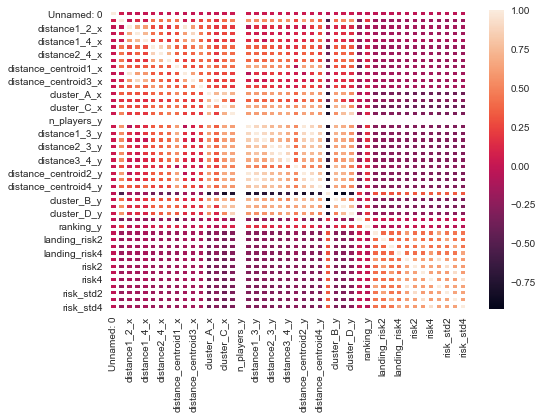

In [100]:
import seaborn
corr_df=teams_f.corr(method='pearson')
seaborn.heatmap(corr_df,linewidths=2.5)

In [109]:
corr_df[corr_df>0.6]

,Unnamed: 0,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
Unnamed: 0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamId,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_2_x,NaN,NaN,1.000000,0.656079,0.607269,NaN,NaN,NaN,NaN,0.954867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_3_x,NaN,NaN,0.656079,1.000000,0.737945,NaN,NaN,NaN,NaN,0.623837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_4_x,NaN,NaN,0.607269,0.737945,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance2_3_x,NaN,NaN,NaN,NaN,NaN,1.000000,0.867308,0.633628,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance2_4_x,NaN,NaN,NaN,NaN,NaN,0.867308,1.000000,0.717462,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance3_4_x,NaN,NaN,NaN,NaN,NaN,0.633628,0.717462,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_centroid1_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_centroid2_x,NaN,NaN,0.954867,0.623837,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
